<a href="https://colab.research.google.com/github/snvssk/data298A/blob/development/SolarEnergy/MLModels/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
#nsrdb = read_and_preprocess()#nsrdb has nd array all weather data
df = pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/FinalWeatherData/all_cities_transformed_combined.csv')

In [24]:
# nsrdb_na = df.drop(columns='Unnamed: 0')
nsrdb_na = df.copy()
#null_rows = nsrdb_na[nsrdb_na.isna().any(axis=1)]
#null_rows
nsrdb_na.isnull().sum()
#nsrdb_na.columns
#nsrdb_na['GHI'].isnull().values.sum()
nsrdb = nsrdb_na.dropna()
#print(nsrdb)
nsrdb.isnull().sum()

Unnamed: 0            0
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Cloud_Type            0
Dew_Point             0
GHI                   0
Relative_Humidity     0
Solar_Zenith_Angle    0
Surface_Albedo        0
Pressure              0
Precipitable_Water    0
Wind_Direction        0
Wind_Speed            0
Location              0
dtype: int64

In [25]:
nsrdb = nsrdb.loc[(nsrdb['Hour'].isin([12,8,16])) & (nsrdb['Minute'] == 0)]
nsrdb= nsrdb.drop(['Unnamed: 0'], axis=1)
nsrdb

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
16,2018.0,1.0,1.0,8.0,0.0,10.7,4.0,9.0,46.0,88.99,84.37,0.100,1025.0,1.800,347.0,0.7,117987.0
24,2018.0,1.0,1.0,12.0,0.0,16.8,7.0,8.9,430.0,59.51,60.35,0.100,1025.0,1.800,25.0,1.1,117987.0
32,2018.0,1.0,1.0,16.0,0.0,15.4,7.0,9.2,114.0,66.62,80.55,0.100,1023.0,1.800,14.0,0.8,117987.0
64,2018.0,1.0,2.0,8.0,0.0,12.2,6.0,8.2,33.0,76.49,84.38,0.100,1024.0,1.800,89.0,1.1,117987.0
72,2018.0,1.0,2.0,12.0,0.0,18.5,6.0,8.4,135.0,51.75,60.26,0.100,1023.0,2.000,58.0,1.2,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946114,2013.0,12.0,30.0,12.0,0.0,18.0,0.0,2.0,518.0,39.99,60.49,0.111,1020.0,0.831,182.5,1.2,117546.0
946122,2013.0,12.0,30.0,16.0,0.0,14.0,7.0,6.0,63.0,70.37,80.93,0.111,1020.0,0.994,266.4,1.0,117546.0
946154,2013.0,12.0,31.0,8.0,0.0,10.0,4.0,8.0,36.0,98.80,84.43,0.111,1020.0,1.310,234.9,0.3,117546.0
946162,2013.0,12.0,31.0,12.0,0.0,16.0,0.0,5.0,506.0,51.64,60.42,0.111,1020.0,1.344,49.9,1.2,117546.0


In [26]:
target = nsrdb['GHI']#keeping only target(ghi) data here
input= nsrdb.drop(['GHI'], axis=1)
input

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
16,2018.0,1.0,1.0,8.0,0.0,10.7,4.0,9.0,88.99,84.37,0.100,1025.0,1.800,347.0,0.7,117987.0
24,2018.0,1.0,1.0,12.0,0.0,16.8,7.0,8.9,59.51,60.35,0.100,1025.0,1.800,25.0,1.1,117987.0
32,2018.0,1.0,1.0,16.0,0.0,15.4,7.0,9.2,66.62,80.55,0.100,1023.0,1.800,14.0,0.8,117987.0
64,2018.0,1.0,2.0,8.0,0.0,12.2,6.0,8.2,76.49,84.38,0.100,1024.0,1.800,89.0,1.1,117987.0
72,2018.0,1.0,2.0,12.0,0.0,18.5,6.0,8.4,51.75,60.26,0.100,1023.0,2.000,58.0,1.2,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946114,2013.0,12.0,30.0,12.0,0.0,18.0,0.0,2.0,39.99,60.49,0.111,1020.0,0.831,182.5,1.2,117546.0
946122,2013.0,12.0,30.0,16.0,0.0,14.0,7.0,6.0,70.37,80.93,0.111,1020.0,0.994,266.4,1.0,117546.0
946154,2013.0,12.0,31.0,8.0,0.0,10.0,4.0,8.0,98.80,84.43,0.111,1020.0,1.310,234.9,0.3,117546.0
946162,2013.0,12.0,31.0,12.0,0.0,16.0,0.0,5.0,51.64,60.42,0.111,1020.0,1.344,49.9,1.2,117546.0


In [27]:
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
input_normalized = sc.fit_transform(input)

In [28]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(input_normalized, target, test_size=0.3, random_state=42)

In [29]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_text shape",y_test.shape)

x_train shape (41391, 16)
x_test shape (17739, 16)
y_train shape (41391,)
y_text shape (17739,)


# Modeling

In [30]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

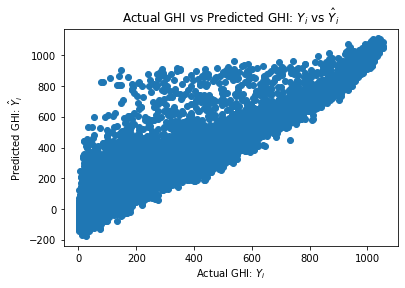

In [31]:
y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual GHI: $Y_i$")
plt.ylabel("Predicted GHI: $\hat{Y}_i$")
plt.title("Actual GHI vs Predicted GHI: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Actual ghi 200 predicting it from 100 to 500, actual is 1000 predicting it as 400 to 1000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


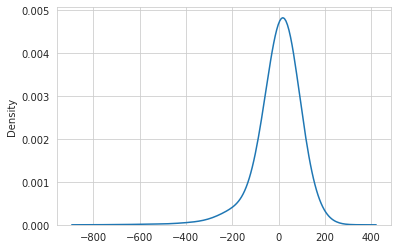

In [32]:
#delta_y is Actual GHI - Predicted GHI
delta_y = y_test - y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

## Error distribution
### delta_y is error, plotting the error distribution to see where maximum error points lie, the mean of error points lies around -10, maximum error is -10

In [33]:
#Here for each data point we are getting actual vs predicted
delta_y.head

<bound method NDFrame.head of 26226    -240.677844
116780    -20.524442
932730     38.681417
536764     43.210535
551518    -48.552718
             ...    
828894     90.773616
45532      48.929293
82072      25.912639
414654    -72.674603
693318     11.435241
Name: GHI, Length: 17739, dtype: float64>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


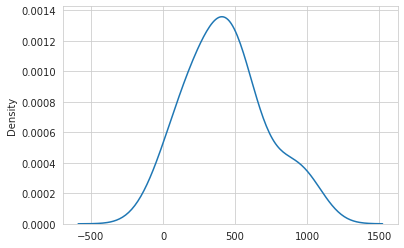

In [34]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

## Actual distribution
###  We need to align error distribution and actual distribution for best model by doing feature engineering. 

In [36]:
from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Model MSE", metrics.mean_squared_error(y_test, y_pred))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model MAE 64.2746045786935
Model MSE 8543.702425344223
Model RMSE 92.43215038796957


In [38]:
from sklearn.metrics import r2_score 
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination R2', R_square) 

Coefficient of Determination R2 0.8985561488523914


## Test

## Cupertino

In [41]:
import pandas as pd
df =pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/FinalWeatherData/cupertino_test.csv')
df
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=lm.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

Model MAE 117.0528427095467
Model MSE 21105.869996518108
Model RMSE 145.27859441954314


## Foster City

In [42]:
import pandas as pd
df =pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/FinalWeatherData/fostercity_test.csv')
df
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=lm.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

Model MAE 120.21464507039968
Model MSE 22341.74116119094
Model RMSE 149.4715396361158


## Los Gatos

In [44]:
import pandas as pd
df =pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/FinalWeatherData/losgatos_test.csv')
df
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=lm.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

Model MAE 115.67548936396693
Model MSE 20425.248805117877
Model RMSE 142.91692973583596


## Saratoga

In [45]:
import pandas as pd
df =pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/FinalWeatherData/saratoga_2020.csv')
df
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
#df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=lm.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

Model MAE 110.95848630870073
Model MSE 18692.634255219153
Model RMSE 136.72100882899875
